# Pulse Programming

In [1]:
import scipy as sci
# import pysindy as ps
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, CubicSpline
from matplotlib.gridspec import GridSpec as GS
from numpy import linalg as LA 
from scipy.integrate import odeint, solve_ivp

In [2]:
def func(t, m,h,gamma,alpha):
     dm=-gamma*(np.cross(m,h)-alpha*np.cross(m,-gamma*np.cross(m,h)))
     
     return dm

In [3]:
def timet(lis,t,thr):
    r=len(lis)
    for i in range(r):
        if (lis[i]<=thr):
            return t[i]
    return(t[-1])

In [74]:
m=[0,np.sin(10*np.pi/180),np.cos(10*np.pi/180)] #inital magentisation
gamma=-1.760  #*10^11 for actual value

alpha=0.04

h=(0,0,-1)
p=(h,gamma,alpha)
t = np.arange(0.0, 40,0.01)
result_odeintz = odeint(func, m, t,p, tfirst=True)


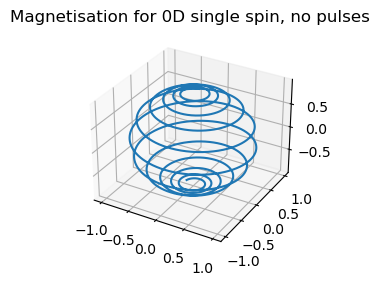

In [145]:
fig=plt.figure()
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot(result_odeintz[:, 0],
        result_odeintz[:, 1],
        result_odeintz[:, 2])
ax.set_title("Magnetisation for 0D single spin, no pulses")
fig.show()

In [32]:
timet(result_odeintz[:, 2],t,np.cos(170*np.pi/180)) #time taken for switching to theta=170 without x pulse

39.33

In [103]:
import math

def pul(t0,t1,t,d):
    t0=math.floor(t0 * 100)/100.0
    t1=math.floor(t1 * 100)/100.0
#     t=math.floor(t * 100)/100.0
    m=[0,np.sin(10*np.pi/180),np.cos(10*np.pi/180)]
    h=(0,0,-1)
    p=(h,gamma,alpha)
    ti = np.arange(0, t0, 0.01)
    tp= np.arange(t0, t1, 0.01)
    tf = np.arange(t1, t, 0.01)
    init = odeint(func, m, ti,p, tfirst=True)
    pp=(d,gamma,alpha)
    pulse=odeint(func, init[-1], tp,pp, tfirst=True)
    fin=odeint(func, pulse[-1], tf,p, tfirst=True)
    ans=np.concatenate((init, pulse,fin), axis=0)
    return ans

    

In [98]:
math.floor(10 * 100)/100.0

10.0

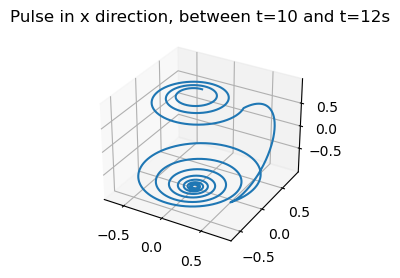

In [146]:
fig=plt.figure()
px=pul(10,12,40,(1,0,0))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot(px[:, 0],
        px[:, 1],
        px[:, 2])
ax.set_title("Pulse in x direction, between t=10 and t=12s")
fig.show()

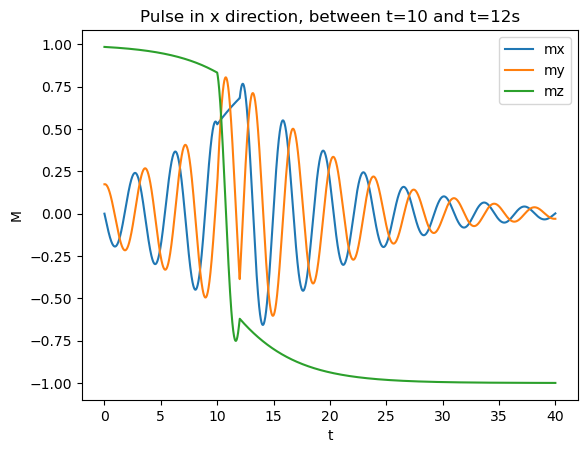

In [84]:
fig = plt.figure()
plt.plot(t,px[:,0], label='mx')
plt.plot(t,px[:,1], label='my')
plt.plot(t,px[:,2], label='mz')
plt.xlabel("t")
plt.ylabel("M")
plt.title("Pulse in x direction, between t=10 and t=12s")
plt.legend()
plt.show()


In [85]:
timet(px[:,2],t,np.cos(170*np.pi/180))

25.810000000000002

## Optimizing time to start pulse, keeping pulse length constant

In [86]:
def optt(n):
    it=[]
    randt=np.random.uniform(low=0.01, high=40, size=(n,))
    for i in randt:
        ttemp=max(40,i+2.1)
        px=pul(i,i+2,ttemp,(1,0,0))
        time=timet(px[:,2],np.arange(0.0, ttemp, 0.01),np.cos(170*np.pi/180))
        it.append([i,time])
    return np.array(it)

In [87]:
from multiprocessing import Pool
from joblib import Parallel, delayed
def proc(i):
        ttemp=max(60,i+2.1)
        px=pul(i,i+2,ttemp,(1,0,0))
        time=timet(px[:,2],np.arange(0.0, ttemp, 0.01),np.cos(170*np.pi/180))
        return [i,time]
def optt(n):
    it=[]
    randt=np.random.uniform(low=0.01, high=40, size=(n,))
    it = Parallel(n_jobs=6)(delayed(proc)(i) for i in randt)
    return np.array(it)

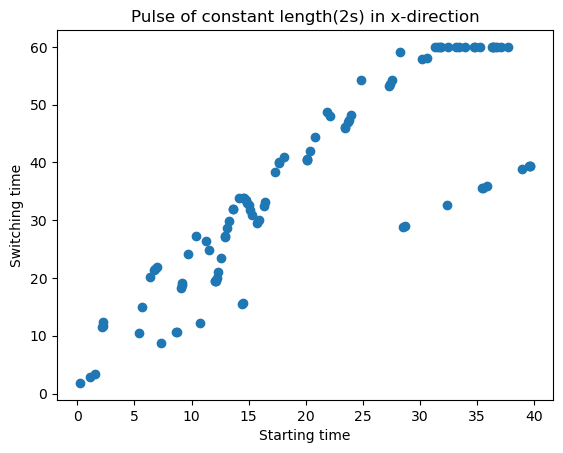

In [88]:
times=optt(100)
fig = plt.figure()
plt.scatter(times[:,0],times[:,1])

plt.xlabel("Starting time")
plt.ylabel("Switching time")
plt.title("Pulse of constant length(2s) in x-direction")
plt.show()


In [161]:
ot=times[times[:, 1].argsort()][0,0]
print(ot)

0.1925968478817651


Text(0.5, 0.92, 'Pulse of 2s starting at optimal time')

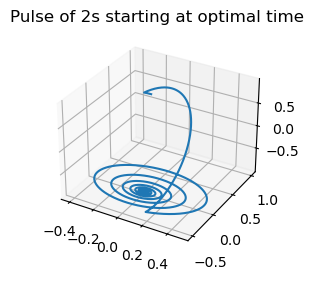

In [147]:
fig=plt.figure()
px=pul(ot,ot+2,40,(1,0,0))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot(px[:, 0],
        px[:, 1],
        px[:, 2])
ax.set_title("Pulse of 2s starting at optimal time")

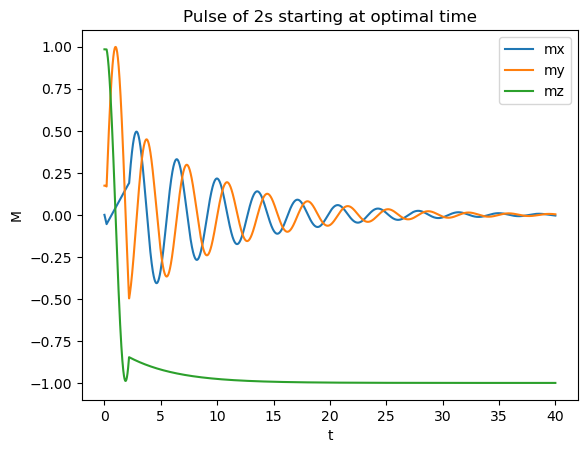

In [106]:
fig = plt.figure()
ttemp=np.arange(0.0, 40, 0.01)
plt.plot(ttemp,px[:,0], label='mx')
plt.plot(ttemp,px[:,1], label='my')
plt.plot(ttemp,px[:,2], label='mz')
plt.xlabel("t")
plt.ylabel("M")
plt.title("Pulse of 2s starting at optimal time")
plt.legend()
plt.show()


# Optimizing pulse length

In [107]:
from multiprocessing import Pool
from joblib import Parallel, delayed
def proc(i):
        ttemp=max(60,i+2.1)
        px=pul(0.80968023,0.80968023+i,ttemp,(1,0,0))
        time=timet(px[:,2],np.arange(0.0, ttemp, 0.01),np.cos(170*np.pi/180))
        return [i,time]
def opttl(l):
    it=[]
    randt=np.arange(0.01,l,0.02)
    it = Parallel(n_jobs=6)(delayed(proc)(i) for i in randt)
    return np.array(it)

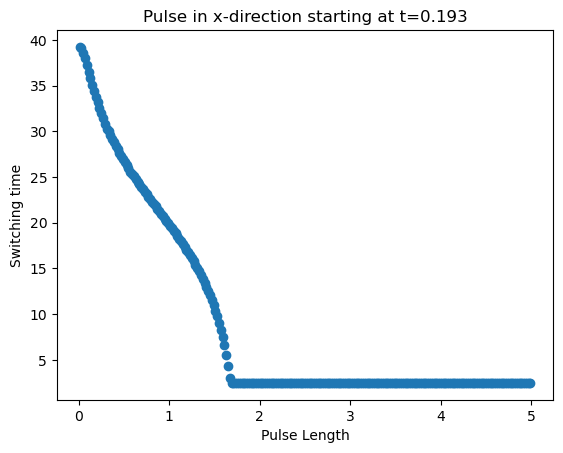

In [113]:
timesl=opttl(5)
fig = plt.figure()
plt.scatter(timesl[:,0],timesl[:,1])
tit="Pulse in x-direction starting at t="+str(round(ot,3))
plt.xlabel("Pulse Length")
plt.ylabel("Switching time")
plt.title(tit)
plt.show()


In [118]:
print(timesl[timesl[:, 1].argsort()][0])
optp=timesl[timesl[:, 1].argsort()][0,0]

[2.49 2.47]


Text(0.5, 0.92, 'Pulse of time 2.49s in x-direction starting at t=0.193')

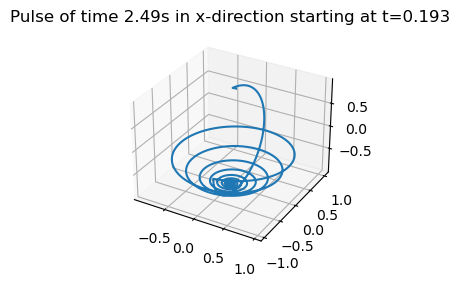

In [133]:
fig=plt.figure()
px=pul(ot,ot+optp,40,(1,0,0))
ax = fig.add_subplot(1, 2, 1, projection='3d')
tit="Pulse of time "+str(round(optp,3)) +"s in x-direction starting at t="+str(round(ot,3))
ax.plot(px[:, 0],
        px[:, 1],
        px[:, 2])
ax.set_title(tit)

In [110]:
#goes to 170deg and comes back, before settling down. If this behaivour is undesirable,
#we can account for this by redefining the switching time function, 
#eg requiring that switching is done when 5 consecutive values are at >170deg.
#It seems that we can just stop the pulse earlier, so that it doesn't come back up(somewhere around 1.7s, see graph )

Text(0.5, 0.92, 'Pulse of time 1.7s in x-direction starting at t=0.193')

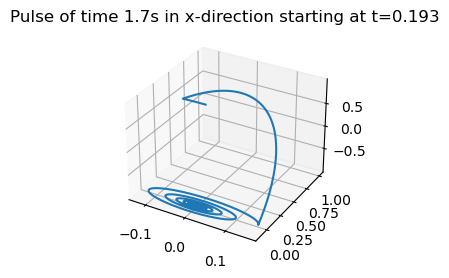

In [143]:
fig=plt.figure()
px=pul(ot,ot+1.7,40,(1,0,0))
ax = fig.add_subplot(1, 2, 1, projection='3d')
tit="Pulse of time 1.7s in x-direction starting at t="+str(round(ot,3))
ax.plot(px[:, 0],
        px[:, 1],
        px[:, 2])
ax.set_title(tit)

In [155]:
def timet1(lis,t,thr):
    r=len(lis)
    a=0
    for i in range(r):
        if (lis[i]<=thr):
            a=a+1
            if(a>=25):
                return t[i]
        else: a=0
    return(t[-1])

In [151]:
timet1(px[:,2],np.arange(0.0, 60, 0.01),np.cos(170*np.pi/180))

1.87

In [152]:
timet(px[:,2],np.arange(0.0, 60, 0.01),np.cos(170*np.pi/180))

1.83

In [156]:
from multiprocessing import Pool
from joblib import Parallel, delayed
def proc(i):
        ttemp=max(60,i+2.1)
        px=pul(0.80968023,0.80968023+i,ttemp,(1,0,0))
        time=timet1(px[:,2],np.arange(0.0, ttemp, 0.01),np.cos(170*np.pi/180))
        return [i,time]
def opttl(l):
    it=[]
    randt=np.arange(0.01,l,0.02)
    it = Parallel(n_jobs=6)(delayed(proc)(i) for i in randt)
    return np.array(it)

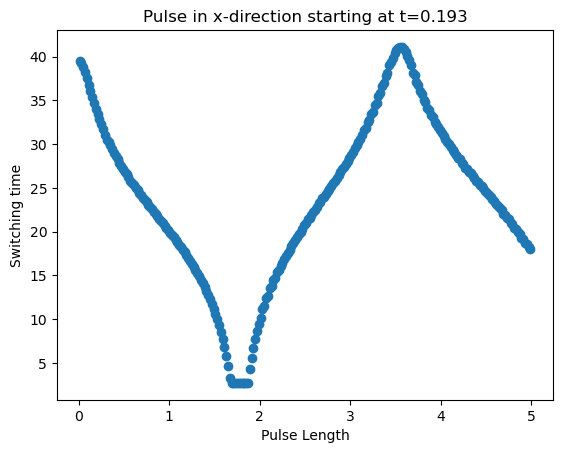

In [157]:
timesl=opttl(5)
fig = plt.figure()
plt.scatter(timesl[:,0],timesl[:,1])
tit="Pulse in x-direction starting at t="+str(round(ot,3))
plt.xlabel("Pulse Length")
plt.ylabel("Switching time")
plt.title(tit)
plt.show()

In [158]:
print(timesl[timesl[:, 1].argsort()][0])
optp=timesl[timesl[:, 1].argsort()][0,0]

[1.81 2.71]


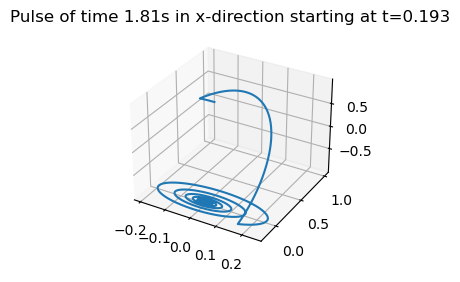

In [160]:
fig=plt.figure()
px=pul(ot,ot+optp,40,(1,0,0))
ax = fig.add_subplot(1, 2, 1, projection='3d')
tit="Pulse of time "+str(round(optp,3)) +"s in x-direction starting at t="+str(round(ot,3))
ax.plot(px[:, 0],
        px[:, 1],
        px[:, 2])
ax.set_title(tit)
fig.show()